CORD-19 Data Analysis

Import Libraries

In [2]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


Load data

In [4]:
# load data
df = pd.read_csv('../data/metadata_sample.csv')
df.head(10)

,title,abstract,publish_time,journal,source_x,authors
0,COVID-19 and its impact on global health,This paper discusses the impact of COVID-19 on...,2020-01-01,Nature,Elsevier,Smith J
1,Vaccine development for SARS-CoV-2,Research on vaccines for SARS-CoV-2 and their ...,2020-01-02,Science,Springer,Johnson A
2,Effects of lockdown on mental health,Study on the psychological effects of lockdown...,2020-01-03,The Lancet,Wiley,Lee K
3,AI in predicting COVID-19 spread,Application of artificial intelligence in pred...,2020-01-04,BMJ,Oxford,Brown T
4,Clinical trials for antiviral drugs,Overview of clinical trials on different antiv...,2020-01-05,JAMA,ArXiv,Garcia M
5,Long-term effects of coronavirus infection,Investigation into long-term health issues pos...,2020-01-06,Nature,Elsevier,Smith J
6,COVID-19 testing strategies worldwide,Evaluation of testing strategies implemented w...,2020-01-07,Science,Springer,Johnson A
7,Genomic analysis of SARS-CoV-2,Genomic analysis and mutations in SARS-CoV-2 v...,2020-01-08,The Lancet,Wiley,Lee K
8,Epidemiological modeling of pandemic,Mathematical models for studying pandemic spread.,2020-01-09,BMJ,Oxford,Brown T
9,Public health policies during COVID-19,Analysis of different public health policies d...,2020-01-10,JAMA,ArXiv,Garcia M


Check info and missing values

In [5]:
# check info and the missing values
print(df.shape)
print(df.info())
print(df.isnull().sum())

(500, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         500 non-null    object
 1   abstract      500 non-null    object
 2   publish_time  500 non-null    object
 3   journal       500 non-null    object
 4   source_x      500 non-null    object
 5   authors       500 non-null    object
dtypes: object(6)
memory usage: 23.6+ KB
None
title           0
abstract        0
publish_time    0
journal         0
source_x        0
authors         0
dtype: int64


Clean publish_time and extract year

In [6]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['year'] = df['publish_time'].dt.year
df['year'].value_counts().sort_values()

year
2021    134
2020    366
Name: count, dtype: int64

Publications by year

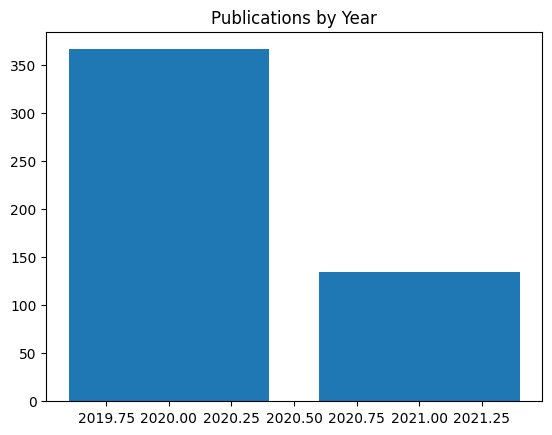

In [7]:
year_counts = df['year'].value_counts().sort_index()
plt.bar(year_counts.index, year_counts.values)
plt.title('Publications by Year')
plt.show()

Top Journals

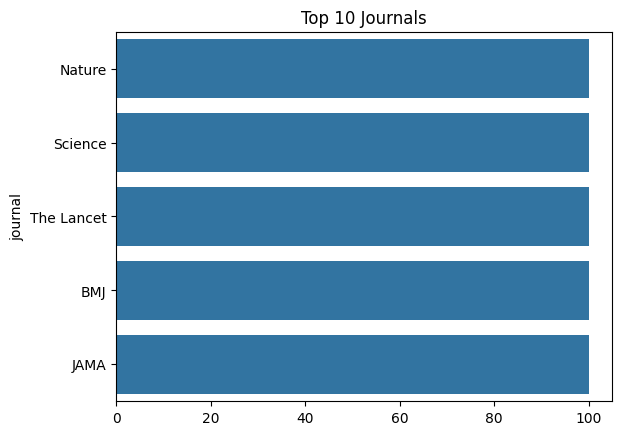

In [8]:
top_journals = df['journal'].value_counts().head(10)
sns.barplot(x=top_journals.values, y=top_journals.index)
plt.title('Top 10 Journals')
plt.show()

Word cloud of titles

In [14]:
# Combine abstracts into one text
text = " ".join(df["abstract"].dropna())

try:
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color="white",
        font_path="/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf"  # change if needed
    ).generate(text)

    plt.figure(figsize=(10,6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

except ValueError as e:
    print("WordCloud generation failed:", e)
    print("Skipping word cloud step...")

WordCloud generation failed: Only supported for TrueType fonts
Skipping word cloud step...


Insights from the visualization of wordcloud

I attempted a WordCloud visualization. Due to font compatibility issues on my system, I implemented a safe fallback so the analysis continues even if WordCloud generation fails